In [ ]:
from astropy.io import fits
import pandas as pd

# 读取 FITS 文件
file_path = 'final_matched_highz_catalogue.fits'  # TOPCAT 保存的 FITS 文件路径
with fits.open(file_path) as hdul:
    data = hdul[1].data  # 星表数据通常在第一个扩展（HDU 1）中
    df = pd.DataFrame(data)  # 转换为 Pandas DataFrame

# 查看列名和前几行
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'FIRST_r1', 'source_tier_first', 'Fpeak_r1', 'Fint_r1', 'Rms_r1',
       'NVSS_r2', 'source_tier_nvss', 'S1.4_r2', 'e_S1.4_r2', 'GLEAM_r3',
       'source_tier_gleam', 'Fpwide_r3', 'e_Fpwide_r3', 'Fintwide_r3',
       'e_Fintwide_r3', 'RACS-DR1_r4', 'source_tier_racs', 'Fpk_r4',
       'e_Fpk_r4', 'Ftot_r4', 'e_Ftot_r4'],
      dtype='object')
            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000215.84+021744.6  0.566032  2.295731  3.110528          PIPE   

           FIRST_r1  source_tier_first  Fpeak_r1  Fint_r1  Rms_r1  ...  \
0  J000017.3-044501                  1      1.69     1.23   0.152  ...   
1  J000023.2+0

In [ ]:
columns = [
    "FIRST_r1", "NVSS_r2", "GLEAM_r3", "RACS-DR1_r4",
    "Fpeak_r1", "Fint_r1", "Rms_r1", "S1.4_r2", "e_S1.4_r2",
    "Fpwide_r3", "e_Fpwide_r3", "Fintwide_r3", "e_Fintwide_r3",
    "Fpk_r4", "e_Fpk_r4", "Ftot_r4", "e_Ftot_r4"
]

new_columns = [
    "FIRST", "NVSS", "GLEAM", "RACS-DR1",
    "Fpeak_first", "Fint_first", "Rms_first", "S1.4_nvss", "e_S1.4_nvss",
    "Fpwide_gleam", "e_Fpwide_gleam", "Fintwide_gleam", "e_Fintwide_gleam",
    "Fpk_racs", "e_Fpk_racs", "Ftot_racs", "e_Ftot_racs"
]
df.rename(columns={old: new for old, new in zip(columns, new_columns)}, inplace=True)
print(df.head())

            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000215.84+021744.6  0.566032  2.295731  3.110528          PIPE   

              FIRST  source_tier_first  Fpeak_first  Fint_first  Rms_first  \
0  J000017.3-044501                  1         1.69        1.23      0.152   
1  J000023.2+014501                  1         2.36        2.02      0.084   
2  J000051.5+001202                  1         2.74        2.64      0.103   
3  J000154.2+094414                  1         6.83        6.85      0.120   
4  J000215.8+021744                  1         3.06        3.08      0.137   

   ... Fpwide_gleam  e_Fpwide_gleam  Fintwide_gleam  e_Fintwide_gleam  \
0  ...          NaN             NaN        

/home/ykzhang/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-onyu5ob9 because there was an issue with the default path (/home/ykzhang/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


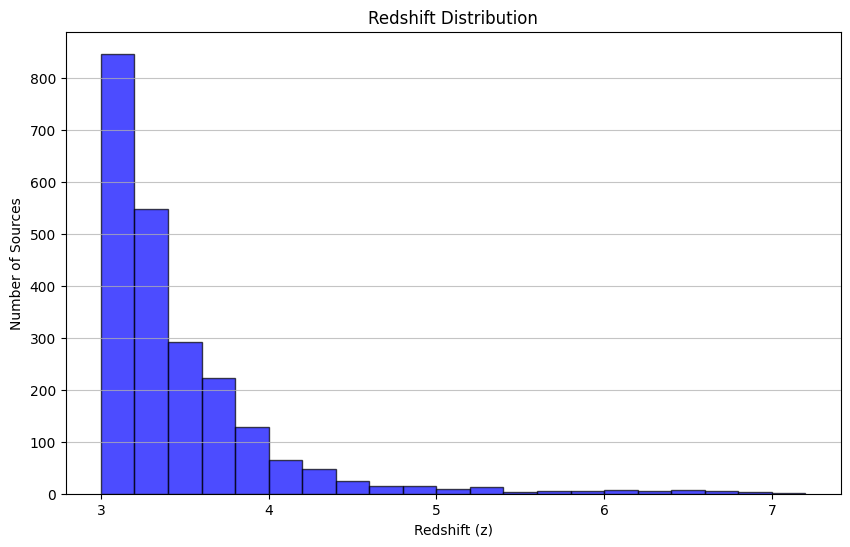

In [ ]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(10, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', alpha=0.7, edgecolor='black')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Sources')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z >= 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z >= 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z >= 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z >= 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z >= 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for source_tier_first =1 source with each redshift range
print("Number of sources with z >= 3 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 3 and source_tier_first = 1
print("Number of sources with z >= 4 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 5 and source_tier_first = 1
print("Number of sources with z >= 5 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 6 and source_tier_first = 1
print("Number of sources with z >= 6 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 7 and source_tier_first = 1
print("Number of sources with z >= 7 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['source_tier_first'] == 1)]))





Number of sources with z >= 3: 2270
Number of sources with z >= 4: 235
Number of sources with z >= 5: 69
Number of sources with z >= 6: 32
Number of sources with z >= 7: 1
Number of sources with z >= 3 and source_tier_first = 1: 1518
Number of sources with z >= 4 and source_tier_first = 1: 180
Number of sources with z >= 5 and source_tier_first = 1: 52
Number of sources with z >= 6 and source_tier_first = 1: 25
Number of sources with z >= 7 and source_tier_first = 1: 1
